# Logistic Neural Network

- https://iamtrask.github.io/2015/07/12/basic-python-network/
- https://www.youtube.com/watch?v=q555kfIFUCM
- http://nbviewer.jupyter.org/github/llSourcell/how_to_do_math_for_deep_learning/blob/master/demo.ipynb

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint

from IPython.display import Image
%matplotlib inline

In [38]:
# features
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
# output dataset
y = np.array([[0,1,1,0]]).T

pd.DataFrame(np.concatenate((X, y), axis=1),
             columns=['x1', 'x2', 'x3', 'y'])

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,0


## Activation function: Sigmoid

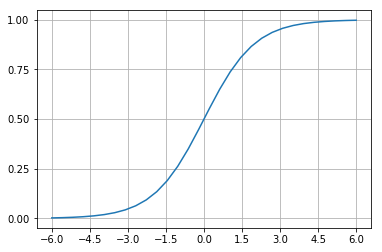

In [178]:
# nonlinear: sigmoid function
def sigmoid(x,deriv=False):
    if deriv:
        return x * (1-x)
    
    return 1 / (1 + np.exp(-x))


_x = np.linspace(-6, 6, 30)

fig, ax = plt.subplots()
ax.plot(_x, sigmoid(_x))
ax.set_xticks(np.linspace(-6, 6, 9))
ax.set_yticks(np.linspace(0, 1, 5))
ax.grid()
plt.show()

## Neural Network Structure

```
[None, 3]
[3, 4]
[4, 1]
```

![](img/nn-layers.png)

### Weights

In [153]:
# seed random numbers to make calculation deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
W0 = 2*np.random.random((3, 4)) - 1 # Convert 3D -> 4D
W1 = 2*np.random.random((4, 1)) - 1 # Convert 4D -> 1D

print('W0:\n', W0)
print('W1:\n', W1)

W0:
 [[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
W1:
 [[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


### Layrers

In [149]:
print('l1 before sigmoid:\n', np.dot(X[:2], W0))
l1 = sigmoid(np.dot(X[:2], W0)) # only input 2 samples
print('l1:\n', l1)

l1 before sigmoid:
 [[-0.20646505  0.07763347 -0.16161097  0.370439  ]
 [-0.91295327 -0.73768934 -0.78909055  0.06156045]]
l1:
 [[ 0.44856632  0.51939863  0.45968497  0.59156505]
 [ 0.28639589  0.32350963  0.31236398  0.51538526]]


In [142]:
l2 = sigmoid(np.dot(l1, W1))
print('l2:\n', l2)

l2:
 [[ 0.47372957]
 [ 0.48895696]]


In [143]:
# Loss function: L1 Loss
loss = np.mean(np.abs(l2 - y[:2]))
print('loss:', loss)

loss: 0.492386307521


In [171]:
# Backpropagation
lr = 0.3 # learning rate

l2_delta = loss * sigmoid(l2, deriv=True) * lr; print('l2_delta:\n', l2_delta)
l1_error = l2_delta.dot(W1.T); print('l1_error:\n', l1_error) # chain rule
l1_delta = l1_error * sigmoid(l1,deriv=True) * lr; print('l1_delta:\n', l1_delta)

# Adjust weights
# W1 += l1.T.dot(l2_delta)
# W0 += l0.T.dot(l1_delta)

l2_delta:
 [[  3.11259832e-06]
 [  1.93351465e-06]
 [  3.77817210e-06]
 [  2.80446398e-06]]
l1_error:
 [[  1.09027101e-05   2.00862998e-05   4.61832707e-06   1.59366338e-05]
 [  6.77265342e-06   1.24774066e-05   2.86885815e-06   9.89967604e-06]
 [  1.32340607e-05   2.43813977e-05   5.60587416e-06   1.93443995e-05]
 [  9.82338693e-06   1.80978393e-05   4.16113181e-06   1.43589731e-05]]
l1_delta:
 [[  8.16707667e-07   1.14792755e-06   2.35344363e-07   8.92783461e-07]
 [  4.75373741e-07   5.98901604e-07   7.32580290e-08   5.78764092e-07]
 [  9.43077890e-07   8.01869806e-07   2.86367557e-07   1.34191927e-06]
 [  7.36746822e-07   4.63541029e-07   1.06630469e-07   1.01848260e-06]]


![](img/backpropagation-1.png)
![](img/backpropagation-2.png)

## Training

In [191]:
N_EPOCHS = 200000
lr = 0.6

# initialize weights randomly with mean 0
W0 = 2*np.random.random((3, 4)) - 1 # Convert 3D -> 4D
W1 = 2*np.random.random((4, 1)) - 1 # Convert 4D -> 1D

for i in range(N_EPOCHS):

    # Forward propagation --------
    
    # First Layer of the Network, specified by the input data
    l0 = X
    # Second Layer of the Network, otherwise known as the hidden layer
    l1 = sigmoid(np.dot(l0, W0))
    # Output layer
    l2 = sigmoid(np.dot(l1, W1))

    # loss function
    l2_errror = y - l2
    loss = np.mean(np.abs(l2 - y))
    if (i % 10000) == 0:
        print(f'(Epoch {i})\tloss: {loss}')
#         print(np.concatenate((l2, y), axis=1))

    # Backward propagation --------
    l2_delta = l2_errror * sigmoid(l2, deriv=True) * lr
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * sigmoid(l1, deriv=True) * lr

    # update weights
    W1 += l1.T.dot(l2_delta)
    W0 += l0.T.dot(l1_delta)

(Epoch 0)	loss: 0.5006054423118955
(Epoch 10000)	loss: 0.013951852623351479
(Epoch 20000)	loss: 0.0092425444809016
(Epoch 30000)	loss: 0.00734412743623565
(Epoch 40000)	loss: 0.006258921740070842
(Epoch 50000)	loss: 0.005536885881687133
(Epoch 60000)	loss: 0.005013177434100024
(Epoch 70000)	loss: 0.004611463806697075
(Epoch 80000)	loss: 0.004290983084572851
(Epoch 90000)	loss: 0.004027754188276536
(Epoch 100000)	loss: 0.0038066385368049505
(Epoch 110000)	loss: 0.003617552358033865
(Epoch 120000)	loss: 0.0034534883485299707
(Epoch 130000)	loss: 0.0033094072599722385
(Epoch 140000)	loss: 0.003181581008301093
(Epoch 150000)	loss: 0.0030671850312516446
(Epoch 160000)	loss: 0.0029640353992494194
(Epoch 170000)	loss: 0.002870413651468004
(Epoch 180000)	loss: 0.0027849467608739675
(Epoch 190000)	loss: 0.002706522845695906
